In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_labels.shape

(10000,)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
train_images[1].shape

(28, 28)

In [7]:
train_labels[1]

0

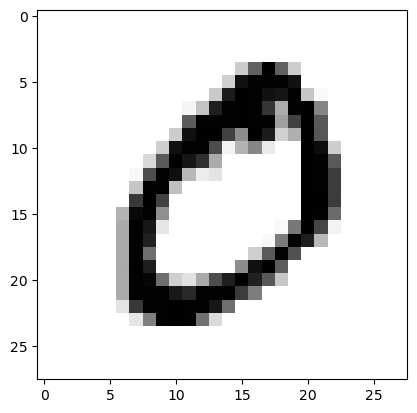

In [8]:
import matplotlib.pyplot as plt
digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [9]:
# from tensorflow import keras
import keras
from tensorflow.keras import layers
model = keras.Sequential([
                            layers.Dense(512, activation="relu"),
                            layers.Dense(10, activation="softmax")
                            ])

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

D:\anaconda\12\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [12]:
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype("float32") / 255

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9225 - loss: 0.2663
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9690 - loss: 0.1064
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9785 - loss: 0.0703
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9848 - loss: 0.0510
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9884 - loss: 0.0386


In [14]:
loss, acc = model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0654


In [15]:
loss

0.06544437259435654

In [16]:
acc

0.98089998960495

In [17]:
test_labels[1]

2

In [18]:
inp = test_images[1].reshape(1,784)

In [19]:
model.predict(inp).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


2

In [20]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [21]:
for p in predictions:
    print(p.argmax)

<built-in method argmax of numpy.ndarray object at 0x000001D630B65710>
<built-in method argmax of numpy.ndarray object at 0x000001D630B65170>
<built-in method argmax of numpy.ndarray object at 0x000001D630B65710>
<built-in method argmax of numpy.ndarray object at 0x000001D630B65170>
<built-in method argmax of numpy.ndarray object at 0x000001D630B65710>
<built-in method argmax of numpy.ndarray object at 0x000001D630B65170>
<built-in method argmax of numpy.ndarray object at 0x000001D630B65710>
<built-in method argmax of numpy.ndarray object at 0x000001D630B65170>
<built-in method argmax of numpy.ndarray object at 0x000001D630B65710>
<built-in method argmax of numpy.ndarray object at 0x000001D630B65170>


In [22]:
test_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [24]:
# At the end of your notebook, run:
model.save("model.h5")
print("Model saved successfully!")

# To see where it was saved:
import os
print(f"Model saved at: {os.path.abspath('model.h5')}")

Model saved successfully!
Model saved at: D:\Important\SMIT\Data Science\Data Analysis\Deep Learning\model.h5
